In [1]:
import sys
sys.path.append('../')
sys.path.append('../performance_tools/')

In [2]:
import os
import pickle
import json
import torch
from copy import deepcopy
from pytorch_nlp_models.text_pair.siamese_rnn import SiameseGRU
from utils.datasets import LCQMCDataset
from utils.model_utils import model_train, model_eval

from torch.utils.data import DataLoader
from dumb_containers import evaluate_performance

In [3]:
DATA_PATH = '../data/'
LCQMC_PATH = os.path.join(DATA_PATH, 'LCQMC')
WORD_VECTORS_PATH = os.path.join(DATA_PATH, 'word_vectors')
BAIDUBAIKE_PKL = os.path.join(WORD_VECTORS_PATH, 'baidubaike.pkl')

MAX_SEQ_LEN = 40

MODEL_PATH = os.path.join(DATA_PATH, 'model_files/siamese_gru')
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)
    
MODEL_FILE = os.path.join(MODEL_PATH, 'model.pkl')

MODEL_CONFIG_JSON = os.path.join(MODEL_PATH, 'config.json')

with open(MODEL_CONFIG_JSON, 'r') as f:
    MODEL_CONFIG = json.load(f)

In [4]:
with open(BAIDUBAIKE_PKL, 'rb') as f:
    wvs = pickle.load(f)
    
wi = wvs['wi']
iw = wvs['iw']
dim = wvs['dim']
emb = wvs['emb']

In [5]:
dataset = LCQMCDataset(LCQMC_PATH, MAX_SEQ_LEN, wi, charmode = True)

In [6]:
def get_loader(dataset, mode, 
               batch_size = 32, 
               shuffle = False):
    _dataset = deepcopy(dataset)
    _dataset.to(mode)
    return DataLoader(_dataset, batch_size=batch_size, shuffle=shuffle)

In [7]:
test_loader = get_loader(dataset, 'test', batch_size = 8)

In [8]:
model = SiameseGRU(**MODEL_CONFIG)
checkpoint = torch.load(MODEL_FILE)
model.load_state_dict(checkpoint['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [9]:
data_ks, data_auc, data_probs, data_gts = model_eval(model, test_loader)

100%|██████████| 1563/1563 [01:00<00:00, 25.67it/s]


In [10]:
data_ks, data_auc

(0.72432, 0.9356245888000001)

KS=0.724, AUC=0.94, N=12500
At threshold=0.5, TPR=0.86, 5384 out of 6250
At threshold=0.5, FPR=0.14, 866 out of 6250
Ave_target: [0.012  0.0344 0.1016 0.1648 0.38   0.62   0.8128 0.9136 0.9696 0.9912]
Ave_predicted: [0.00376328 0.03488081 0.14116116 0.37498984 0.66054988 0.85535246
 0.94143283 0.9750793  0.98994052 0.99688357]


../performance_tools/dumb_containers.py:378: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  maxind = plb.find(tpr-fpr == ks)
../performance_tools/dumb_containers.py:382: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  minind = plb.find(abs(cum_total - event_rate) == min(abs(cum_total - event_rate)))


0.72432

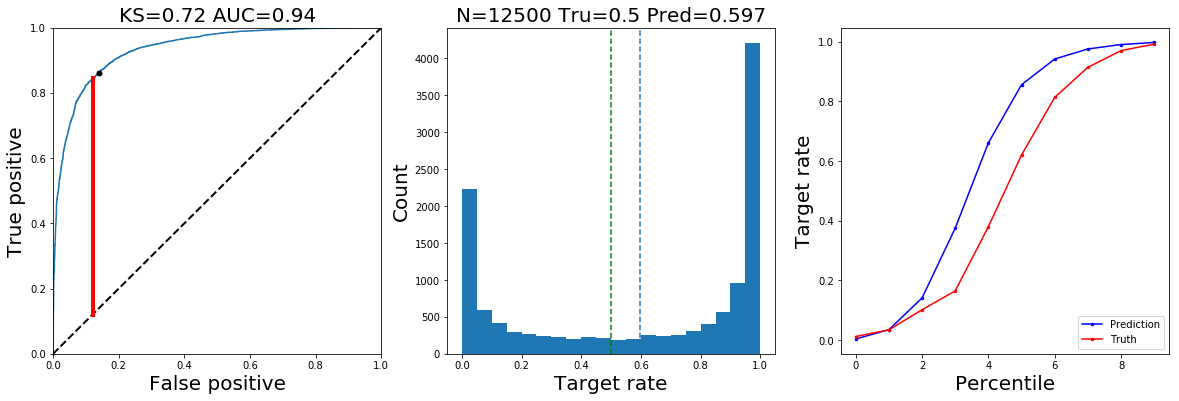

In [11]:
evaluate_performance(data_gts, data_probs)

In [12]:
for i, j in zip(data_probs, data_gts):
    print('{:.4f} -- {:d}'.format(i,j))

0.0888 -- 0
0.9750 -- 1
0.0555 -- 0
0.9705 -- 1
0.1279 -- 0
0.0458 -- 0
0.9574 -- 1
0.9641 -- 1
0.9910 -- 1
0.0656 -- 0
0.9881 -- 1
0.9937 -- 1
0.9352 -- 0
0.9778 -- 1
0.9388 -- 0
0.9704 -- 1
0.0018 -- 0
0.9992 -- 1
0.3904 -- 0
0.0073 -- 0
0.9857 -- 1
0.3029 -- 0
0.9274 -- 1
0.0057 -- 1
0.7324 -- 0
0.4614 -- 0
0.9934 -- 1
0.1838 -- 0
0.0040 -- 0
0.5090 -- 0
0.9836 -- 1
0.0661 -- 0
0.9924 -- 1
0.9021 -- 1
0.2306 -- 0
0.2677 -- 0
0.9855 -- 1
0.9660 -- 1
0.7882 -- 1
0.0183 -- 0
0.9694 -- 1
0.0504 -- 0
0.0306 -- 0
0.9930 -- 0
0.9903 -- 1
0.0366 -- 0
0.9837 -- 1
0.9750 -- 0
0.6027 -- 1
0.6452 -- 0
0.7368 -- 1
0.9845 -- 1
0.9614 -- 1
0.9853 -- 1
0.9832 -- 1
0.9920 -- 1
0.3962 -- 1
0.0003 -- 0
0.0013 -- 0
0.0792 -- 0
0.9839 -- 1
0.4935 -- 0
0.6900 -- 1
0.9824 -- 1
0.9705 -- 1
0.3092 -- 0
0.9970 -- 1
0.9418 -- 1
0.0005 -- 0
0.9835 -- 1
0.9767 -- 1
0.9139 -- 1
0.6714 -- 0
0.9011 -- 1
0.9888 -- 1
0.0836 -- 0
0.6755 -- 1
0.9847 -- 1
0.9939 -- 1
0.9780 -- 1
0.9946 -- 1
0.9962 -- 1
0.9779 -- 1
0.01

0.8028 -- 1
0.9600 -- 1
0.9874 -- 1
0.0034 -- 0
0.0820 -- 0
0.9936 -- 1
0.9870 -- 1
0.9773 -- 1
0.9629 -- 1
0.9864 -- 1
0.2623 -- 0
0.9305 -- 1
0.9801 -- 1
0.9392 -- 0
0.3341 -- 0
0.0840 -- 0
0.6673 -- 0
0.9912 -- 1
0.8106 -- 0
0.0003 -- 0
0.8904 -- 1
0.7385 -- 1
0.0396 -- 0
0.9819 -- 1
0.9979 -- 1
0.3321 -- 0
0.0191 -- 0
0.1467 -- 0
0.0007 -- 0
0.9780 -- 1
0.0294 -- 0
0.1120 -- 0
0.5967 -- 1
0.3074 -- 0
0.9976 -- 1
0.9333 -- 1
0.9684 -- 1
0.9787 -- 1
0.9803 -- 1
0.0109 -- 0
0.9437 -- 1
0.0677 -- 0
0.7089 -- 0
0.9151 -- 1
0.7681 -- 1
0.9281 -- 1
0.9969 -- 1
0.0192 -- 0
0.6112 -- 0
0.0149 -- 0
0.4330 -- 0
0.9812 -- 1
0.9945 -- 1
0.9947 -- 1
0.1314 -- 0
0.9825 -- 1
0.9966 -- 1
0.9785 -- 1
0.9916 -- 1
0.9451 -- 1
0.9821 -- 1
0.8959 -- 1
0.0884 -- 0
0.7604 -- 0
0.4009 -- 0
0.1384 -- 1
0.0121 -- 0
0.6474 -- 0
0.9752 -- 1
0.9909 -- 1
0.0056 -- 0
0.7720 -- 0
0.9019 -- 1
0.5274 -- 1
0.9952 -- 1
0.2549 -- 0
0.9973 -- 1
0.2697 -- 0
0.9978 -- 1
0.0010 -- 0
0.9748 -- 1
0.0323 -- 0
0.9954 -- 1
0.41

0.0467 -- 0
0.9372 -- 1
0.4221 -- 1
0.4515 -- 0
0.4838 -- 0
0.9998 -- 1
0.8668 -- 1
0.9983 -- 1
0.7625 -- 0
0.9671 -- 1
0.9971 -- 1
0.1346 -- 0
0.9973 -- 1
0.9440 -- 1
0.5361 -- 1
0.6773 -- 0
0.7067 -- 0
0.9368 -- 1
0.9626 -- 1
0.9960 -- 1
0.9970 -- 1
0.2359 -- 0
0.9965 -- 1
0.1794 -- 1
0.8787 -- 1
0.3253 -- 0
0.9665 -- 1
0.9941 -- 1
0.1023 -- 0
0.9982 -- 1
0.1097 -- 0
0.9981 -- 1
0.9679 -- 1
0.9774 -- 1
0.9667 -- 1
0.9892 -- 1
0.0648 -- 0
0.9754 -- 1
0.9970 -- 1
0.0968 -- 0
0.0050 -- 0
0.9764 -- 1
0.5623 -- 0
0.1262 -- 0
0.9911 -- 1
0.6990 -- 0
0.1931 -- 0
0.9617 -- 1
0.8008 -- 0
0.9986 -- 1
0.0051 -- 0
0.0448 -- 0
0.9942 -- 1
0.0016 -- 0
0.1675 -- 0
0.0069 -- 0
0.9158 -- 1
0.9973 -- 1
0.9944 -- 1
0.7304 -- 1
0.0038 -- 0
0.9700 -- 1
0.8807 -- 0
0.0002 -- 0
0.0043 -- 0
0.1527 -- 0
0.0035 -- 0
0.3663 -- 0
0.9937 -- 1
0.0018 -- 0
0.9936 -- 1
0.9375 -- 1
0.9851 -- 1
0.0011 -- 0
0.1438 -- 0
0.9511 -- 1
0.8968 -- 1
0.1414 -- 0
0.9926 -- 1
0.9370 -- 1
0.8344 -- 1
0.9739 -- 0
0.9054 -- 1
0.97

0.9824 -- 1
0.1233 -- 0
0.9953 -- 1
0.9970 -- 1
0.9874 -- 1
0.1021 -- 1
0.7208 -- 0
0.9968 -- 1
0.6858 -- 0
0.9809 -- 1
0.0471 -- 0
0.0912 -- 0
0.0134 -- 0
0.0011 -- 0
0.9736 -- 1
0.9961 -- 1
0.9958 -- 1
0.9977 -- 1
0.3322 -- 0
0.9977 -- 1
0.9912 -- 1
0.8135 -- 0
0.8564 -- 1
0.9883 -- 1
0.5262 -- 0
0.2988 -- 0
0.0187 -- 0
0.4768 -- 0
0.9665 -- 1
0.9950 -- 1
0.0736 -- 0
0.8792 -- 0
0.0002 -- 0
0.0118 -- 0
0.9087 -- 1
0.9197 -- 1
0.9414 -- 0
0.0495 -- 0
0.0022 -- 0
0.0010 -- 0
0.9979 -- 1
0.6294 -- 0
0.9942 -- 1
0.9512 -- 1
0.0763 -- 0
0.9844 -- 1
0.9945 -- 1
0.9690 -- 0
0.8043 -- 1
0.9817 -- 1
0.7202 -- 0
0.3763 -- 0
0.9832 -- 1
0.9496 -- 0
0.5676 -- 0
0.2956 -- 0
0.0807 -- 0
0.0376 -- 0
0.0039 -- 0
0.9991 -- 1
0.9753 -- 1
0.9978 -- 1
0.0151 -- 0
0.9678 -- 1
0.0744 -- 1
0.9838 -- 1
0.9823 -- 0
0.0062 -- 0
0.9788 -- 1
0.2021 -- 0
0.9962 -- 1
0.9432 -- 1
0.9856 -- 1
0.0943 -- 0
0.9912 -- 1
0.2841 -- 0
0.9973 -- 1
0.9911 -- 1
0.4447 -- 0
0.6249 -- 0
0.9854 -- 1
0.9891 -- 0
0.1389 -- 0
0.99

0.9952 -- 1
0.9986 -- 1
0.3968 -- 0
0.9906 -- 1
0.9687 -- 1
0.9854 -- 1
0.9000 -- 0
0.9902 -- 1
0.9947 -- 1
0.1794 -- 0
0.9499 -- 1
0.8876 -- 1
0.9489 -- 0
0.9974 -- 1
0.0143 -- 0
0.1939 -- 0
0.9814 -- 1
0.9828 -- 1
0.9939 -- 1
0.3553 -- 1
0.9335 -- 1
0.8012 -- 1
0.0683 -- 0
0.9936 -- 1
0.0515 -- 0
0.6611 -- 1
0.9618 -- 1
0.0487 -- 0
0.0006 -- 0
0.9931 -- 1
0.9823 -- 1
0.2110 -- 0
0.9886 -- 1
0.9942 -- 1
0.8140 -- 0
0.9986 -- 1
0.9929 -- 1
0.6106 -- 1
0.9694 -- 1
0.9881 -- 1
0.0017 -- 0
0.9418 -- 1
0.1266 -- 0
0.8973 -- 1
0.0020 -- 0
0.2854 -- 0
0.9981 -- 1
0.5534 -- 0
0.0119 -- 0
0.7986 -- 0
0.4519 -- 0
0.0317 -- 0
0.5711 -- 1
0.0000 -- 0
0.0997 -- 0
0.3820 -- 1
0.0029 -- 0
0.0008 -- 0
0.9990 -- 1
0.9965 -- 1
0.9972 -- 1
0.9091 -- 1
0.9421 -- 1
0.9988 -- 1
0.9889 -- 1
0.0518 -- 0
0.9974 -- 1
0.7946 -- 0
0.7956 -- 0
0.0015 -- 0
0.9971 -- 1
0.9601 -- 0
0.7830 -- 1
0.9938 -- 1
0.0009 -- 0
0.9925 -- 1
0.8881 -- 0
0.9177 -- 1
0.9818 -- 1
0.9650 -- 1
0.6719 -- 0
0.0673 -- 1
0.7974 -- 1
0.05

In [13]:
data_gts

array([0, 1, 0, ..., 1, 0, 1])